LATAR BELAKANG

Sebagai salah satu transportasi umum di Jakarta, Tranjakarta perlu memahami informasi penggunanya agar dapat memberikan pelayanan yang sesuai dengan kebutuhan dari penggunanya serta dapat meningkatkan fasilitas pelayanannya. Selain itu, waktu para pengguna untuk menggunakan Tranjakarta serta rute yang paling banyak digunakan perlu diketahui untuk mengoptimalkan jumlah armada yang beroperasi pada waktu tertentu dan rute tertentu. Oleh karena itu, memahami kebutuhan tersebut perlu dilakukan untuk meningkatkan pelayanan dari Transjakarta. 

RUMUSAN MASALAH

1) Siapa saja pengguna utama dari Transjakarta?
2) Pada jam berapa tingkat pengguaan Transjakarta paling tinggi?
3) Rute mana saja yang paling sering digunakan ?

DATA PREPARATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Transjakarta.csv')

In [3]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [4]:
df.tail()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


DATA UNDERSTANDING AND CLEANING

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Pada proses ini, kita akan mengetahui anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Berikut informasi mengenai Row Data dalam dataset Transjakarta tersebut :

- transID             : ID transaksi yang unik untuk setiap transaksi.
- payCardID           : Identifikasi utama dari pelanggan. Kartu yang digunakan pelanggan sebagai tiket untuk masuk dan keluar.
- payCardBank         : Nama bank penerbit kartu pembayaran milik pelanggan.
- payCardName         : Nama pelanggan yang ada di kartu.
- payCardSex          : Jenis kelamin pelanggan yang ada di kartu.
- payCardBirthDate    : Tahun kelahiran pelanggan.
- corridorID          : ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
- corridorName        : Nama Koridor / Nama Rute berisi Mulai dan Selesai untuk setiap rute.
- direction           : Arah rute. 0 untuk Pergi, 1 untuk Pulang.
- tapInStops          : ID halte tempat pelanggan melakukan Tap Masuk.
- tapInStopsName      : Nama halte tempat pelanggan melakukan Tap Masuk.
- tapInStopsLat       : Garis lintang dari halte tempat pelanggan melakukan Tap Masuk.
- tapInStopsLon       : Garis bujur dari halte tempat pelanggan melakukan Tap Masuk.
- stopStartSeq        : Posisi halte awal dalam rute perjalanan pelanggan pada saat melakukan Tap Masuk.
- tapInTime           : Waktu pelanggan melakukan Tap Masuk yang mencakup tanggal dan jam.
- tapOutStops         : ID halte tempat pelanggan melakukan Tap Keluar.
- tapOutStopsName     : Nama halte tempat pelanggan melakukan Tap Keluar.
- tapOutStopsLat      : Garis lintang dari halte tempat pelanggan melakukan Tap Keluar.
- tapOutStopsLon      : Garis bujur dari halte tempat pelanggan melakukan Tap Keluar.
- stopEndSeq          : Posisi halte akhir dalam rute perjalanan pelanggan pada saat melakukan Tap Keluar.
- tapOutTime          : Waktu pelanggan melakukan Tap Keluar yang mencakup tanggal dan jam.
- payAmount           : Jumlah yang dibayarkan pelanggan. Beberapa gratis. Beberapa berbayar.

In [5]:
print(f'Jumlah baris dan kolom dari dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom dari dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-n

In [6]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Drop Unnecessary Column

Pada bagian ini, beberapa kolom dihapus karena tidak digunakan untuk analisa data

In [7]:
for col in ['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount', 'tapInStops']:
    del df[col]
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26


In [8]:
print(f'Jumlah baris dan kolom dari dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom dari dataset df adalah (37900, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStopsName    37900 non-null  object 
 10  tapInStopsLat     37900 non-null  float64
 11  tapInStopsLon     37900 non-null  float64
 12  stopStartSeq      37900 non-null  int64  
 13  tapInTime         37900 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 4.0+ MB


In [9]:
# Check dulpikat data
df.duplicated().sum()

0

In [10]:
# Melihat missing value dari tiap kolom
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
dtype: int64

In [11]:
def fill_missing_values(row):
    if pd.isnull(row['corridorID']) or pd.isnull(row['corridorName']):
        condition= df['tapInStopsName']==row['tapInStopsName']
        row['corridorID']=df.loc[condition, 'corridorID'].iloc[0]
        row['corridorName']=df.loc[condition, 'corridorName'].iloc[0]
    return row

df=df.apply(fill_missing_values, axis=1)
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26


In [12]:
# Melihat missing value dari tiap kolom
df.isna().sum()

transID             0  
payCardID           0  
payCardBank         0  
payCardName         0  
payCardSex          0  
payCardBirthDate    0  
corridorID          128
corridorName        214
direction           0  
tapInStopsName      0  
tapInStopsLat       0  
tapInStopsLon       0  
stopStartSeq        0  
tapInTime           0  
dtype: int64

In [13]:
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          0.337731
corridorName        0.564644
direction           0.000000
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
dtype: float64

Setelah mengisi missing value menggunakan nilai dari kolom yang berkaitan, jumlah missing value menjadi sedikit dan dapat dihapus 

In [14]:
df.dropna(axis=0, inplace=True)
df.isna().sum()/df.shape[0]*100

transID             0.0
payCardID           0.0
payCardBank         0.0
payCardName         0.0
payCardSex          0.0
payCardBirthDate    0.0
corridorID          0.0
corridorName        0.0
direction           0.0
tapInStopsName      0.0
tapInStopsLat       0.0
tapInStopsLon       0.0
stopStartSeq        0.0
tapInTime           0.0
dtype: float64

Sekarang missing value sudah tidak ada dan akan dilakukan data analysis

DATA ANALYSIS

Pada tahap ini, kita akan melakukan analisa data untuk menjawab pertanyaan pada rumusan masalah yang sudah dibuat

Kita ingin mengetahui pengguna utama dari Transjakarta
- yang pertama kita lihat jenis kelamin
- yang kedua kita lihat dari umur pengguna

In [15]:
df['payCardSex'].value_counts()

payCardSex
F    20036
M    17634
Name: count, dtype: int64

<Axes: ylabel='count'>

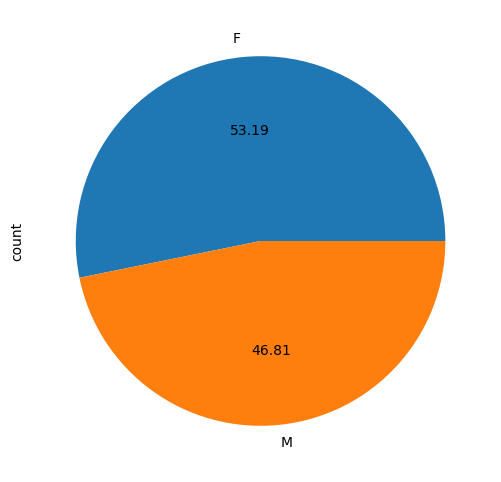

In [16]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

df['payCardSex'].value_counts().plot(kind='pie', figsize=(14,6), autopct=autopct)

Dari grafik ini, dapat dilihat bahwa banyak pengguna Tranjakarta yang berjenis kelamin perempuan.

In [17]:
df['payCardBirthDate'].value_counts()

payCardBirthDate
1992    1384
1981    1376
1994    1344
1987    1276
1985    1246
        ... 
1949    8   
1955    5   
1954    4   
1958    4   
1950    1   
Name: count, Length: 67, dtype: int64

In [18]:
today=datetime.today()
df['usia']=today.year-df['payCardBirthDate']
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,usia
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,16
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,27
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,32
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,46
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,20
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,50
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,48
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,48


In [19]:
def age_range(age):
    if age<10:
        return 'Under 10'
    elif age <31:
        return '10-30'
    elif age <51:
        return '31-50'
    else:
        return '51+'

df['RangeUsia']=df['usia'].apply(age_range)
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,usia,RangeUsia
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,16,10-30
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,27,10-30
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,32,31-50
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,46,31-50
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,42,31-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,20,10-30
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,50,31-50
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,48,31-50
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,48,31-50


In [20]:
df['RangeUsia'].value_counts()

RangeUsia
31-50    18416
10-30    15131
51+      4123 
Name: count, dtype: int64

<Axes: xlabel='RangeUsia', ylabel='count'>

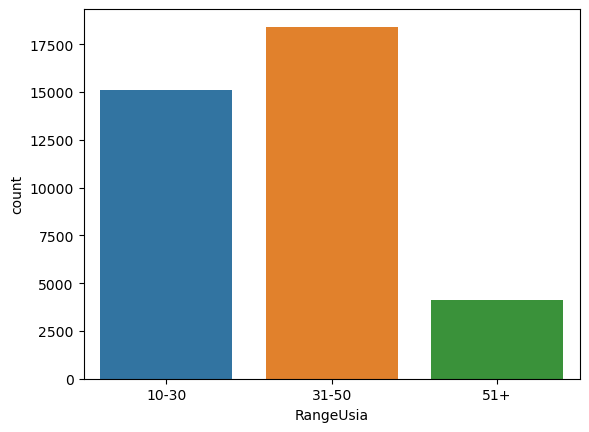

In [21]:
sns.countplot(data=df, x='RangeUsia')

Dari diagram dapat dilihat, pengguna Transjakarta paling banyak diusia range 31-50 dan 10-30 tahun. 

Dari dua diagram diatas dapat dilihat
- Pengguna Transjakarta paling banyak digunakan oleh Perempuan
- Pengguna Transjakarta paling banyak di range 31-50 tahun lalu usia 10-30 tahun


Selanjutnya kita ingin mengetahui waktu dengan penggunaan Transjakarta tertinggi.
Untuk mencari waktunya, kita buat kolom tambahan yaitu jam

In [22]:
df['tapInTime']=pd.to_datetime(df['tapInTime'])
df['jam']=df['tapInTime'].dt.time
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,usia,RangeUsia,jam
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,16,10-30,05:21:44
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,27,10-30,05:42:44
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,32,31-50,05:59:06
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,46,31-50,05:44:51
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,42,31-50,06:17:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,20,10-30,18:18:37
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,50,31-50,21:52:31
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,48,31-50,10:29:47
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,48,31-50,19:59:26


In [45]:
df['jam'].value_counts()

jam
06:57:17    7
06:15:53    7
06:36:00    7
06:49:09    7
06:26:43    7
           ..
21:18:07    1
20:12:48    1
19:47:52    1
18:25:45    1
19:59:26    1
Name: count, Length: 24630, dtype: int64

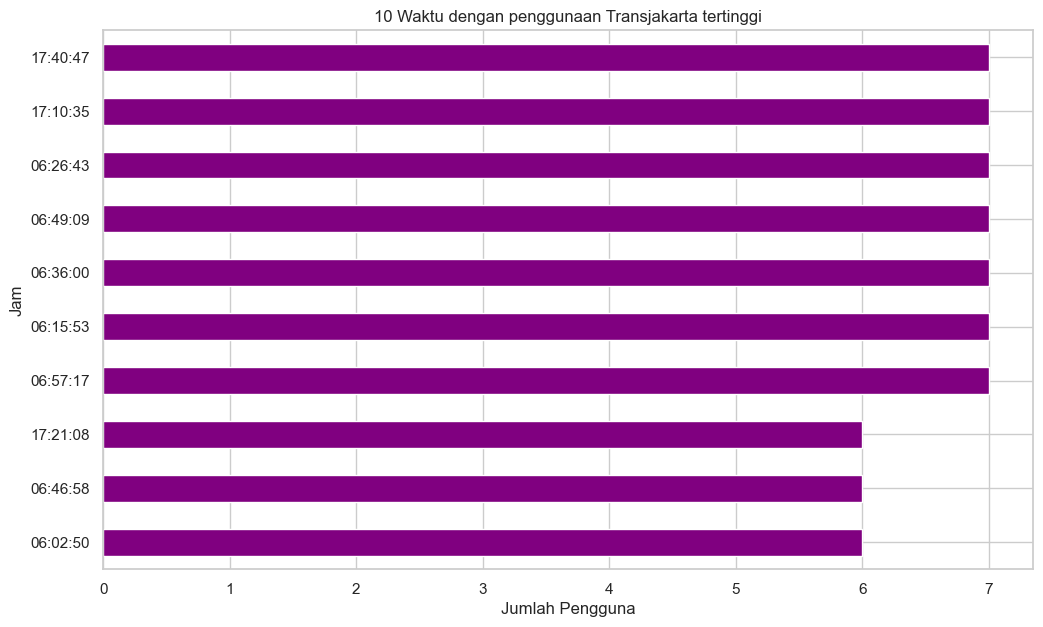

In [43]:
jam_TJ = df['jam'].value_counts().head(10)

plt.figure(figsize=(12, 7))
jam_TJ.sort_values().plot(kind='barh', color='purple')
plt.title('10 Waktu dengan penggunaan Transjakarta tertinggi')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Jam')
plt.show()

Dari grafik di atas, dapat dilihat bahwa jam tertinggi berada diantara 06:15 hingga 06:57 dan 17:10 hingga 17:40

Selanjutnya kita akan mencari Corridor dengan penggunaan tertinggi menggunakan kolom 'corridorID'

In [24]:
df['corridorID'].value_counts()

corridorID
1T        403
S21       395
JIS3      355
8C        348
JAK.06    341
         ... 
1R        41 
JAK.99    31 
JAK.12    24 
7B        17 
M5        15 
Name: count, Length: 221, dtype: int64

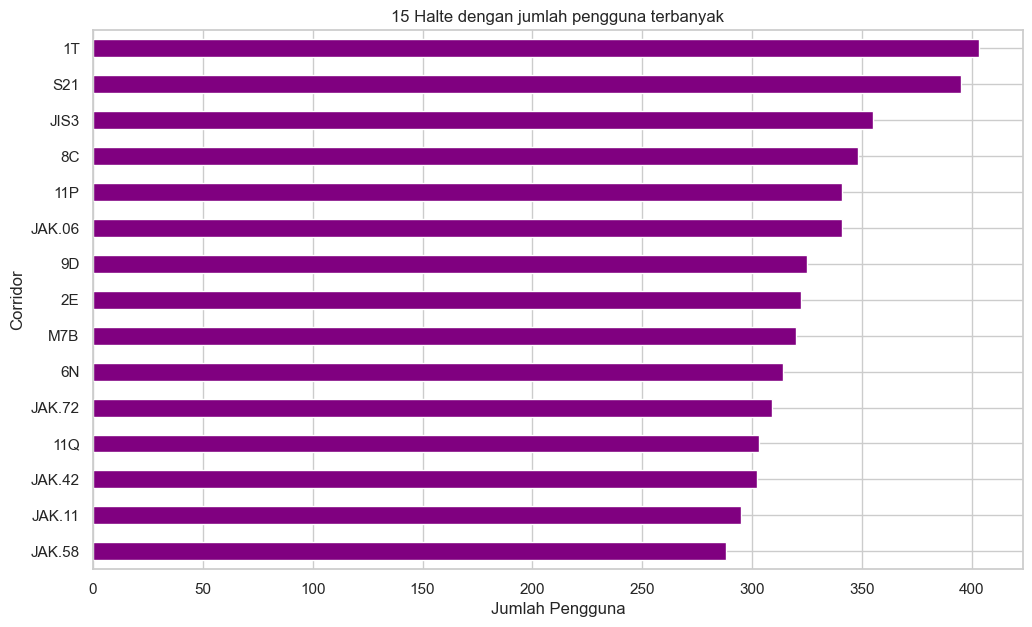

In [39]:
top_stops = df['corridorID'].value_counts().head(15)

plt.figure(figsize=(12, 7))
top_stops.sort_values().plot(kind='barh', color='purple')
plt.title('15 Halte dengan jumlah pengguna terbanyak')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Corridor')
plt.show()

Dari grafik di atas dapat dilihat corridor tertinggi adalah 1T lalu kedua S21 hingga JAK.58

Kesimpulan dan Rekomendasi

KESIMPULAN
Dari hasil analisa yang sudah dilakukan dapat disimpulakn
1) Pengguna utama dari Transjakarta jika dilihat dari jenis kelamin banyak didominasi oleh Perempuan.
2) Pengguna utama Transjakata banyak direntang umur 31-50 tahun dan rentang umur 10-30 tahun
3) Penggunaan Transjakarta tertinggi berada pada jam  06:15 hingga 06:57 dan jam 17:10 hingga 17:40
4) Corridor dengan jumlah pengguna tertinggi adalah corridor 1T sidudul corridor S21, JIS3, 8C, 11P dst.

REKOMENDASI
Untuk meingkatkan pelayanan, Transjakarta dapat melakukan hal berikut menyesuiakan dengan hasil analisa data di atas
1) Pengguna Transjakarta banyak didominasi oleh wanita, sehingga dapat menambah kan space ruang untuk wanita di dalam Bus Transjakarta atau dapat menambahkan jumlah armada bus khusus wanita.
2) Pengguna Transjakarta banyak berumur diantara 31-50, Transjakarta dapat memberikan tempat prioritas untuk penumpang tertentu dilihat dari umur penumpang, sehingga kenyamanan pengguna dapat terjaga.
3) Pada jam-jam dengan penggunaan tertinggi, Transjakarta dapat meningkatkan jumlah armadanya, sehingga penumpukan penumpang bisa dihindari.
   selain itu, Transjakarta dapat mengurangi jumlah armada yang beroperasi di jam tertentu dimana penggunanya tidak terlalu banyak.
4) Pada Corridor dengan kepadatan tinggi, kapasitas perlu di perhatikan agar tidak terjadi penumpukan pada corridor.